# PS1-3 Poisson Regression

## d. Coding Problem

### 1. Import Library

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import cs229_2018_autumn.problem_sets.PS1.src.util as util
from cs229_2018_autumn.problem_sets.PS1.src.linear_model import LinearModel

### 2. Load Dataset

In [2]:
x_train, y_train = util.load_dataset('/media/anhnt02/Anhnt02/CloudLinux/computer_vision/CS229/cs229_2018_autumn/problem_sets/PS1/data/ds4_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('/media/anhnt02/Anhnt02/CloudLinux/computer_vision/CS229/cs229_2018_autumn/problem_sets/PS1/data/ds4_valid.csv', add_intercept=True)

### 3. Plot the Traning set

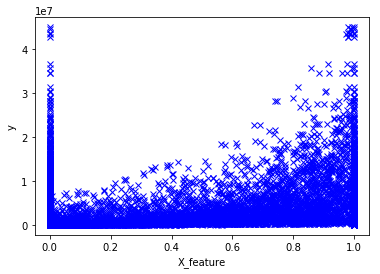

In [3]:
plt.xlabel('X_feature')
plt.ylabel('y')
plt.plot(x_train[:, 1:], y_train, 'bx', linewidth=2)
plt.show()

### 4. Implement Poisson Regression

In [4]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    #Initinalize Constructor
    def __init__(self, step_size):
        super(PoissonRegression, self).__init__()
        self.step_size = step_size #step_size = learning rate
        self.theta = None
        self.x = None
        self.y = None

    #fit data to model
    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        #1. Get Feature Shape
        m, n = x.shape

        #2. Initialize theta value
        if (self.theta is None):
            self.theta = np.zeros(n)

        #3. Apply formular
        ##METHOD 1: Using Batch Gradient Ascent
        theta_old = np.ones(n)
        while np.linalg.norm(self.theta - theta_old, 1) >= self.eps:
            for j in range(n):
                theta_old[j] = self.theta[j]
                for i in range(m):
                    self.theta[j] += self.step_size / m * (x[i][j] * (y[i] - np.exp(self.theta @ x[i])))

        ##METHOD 2: USING Stochastic Gradient Ascent
        # theta_old = np.ones(n)
        # while np.linalg.norm(self.theta - theta_old, 1) >= self.eps:
        #     for i in range(m):
        #         for j in range(n):
        #             theta_old[j] = self.theta[j]
        #             self.theta[j] += self.step_size / m * (x[i][j] * (y[i] - np.exp(self.theta @ x[i])))


        ##METHOD 3: USING VECTOR MATRIX
        # theta_old = np.ones(n)
        # while np.linalg.norm(self.theta - theta_old, 1) >= self.step_size:
        #     theta_old = self.theta.copy()
        #     self.theta += self.step_size / m * x.T @ (y - np.exp(x @ self.theta))

        ##Print Theta
        theta_size = len(self.theta)
        print('Theta: [')
        for i in range(theta_size):
            print(f'Theta_{i}: {self.theta[i]}')
        print(']')
    #predict phase
    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        #Tesing time
        h = np.exp(x @ self.theta)
        return h


### 5. Training Model

In [ ]:
clf = PoissonRegression(step_size=2e-7)
clf.fit(x_train, y_train)

### 6. Predict Phase

In [19]:
y_valid_pred = clf.predict(x_valid)

### 7. Report MSE

In [20]:
def mean_squared_error(y_true, y_pred):
    diff = 0
    for i in range(len(y_true)):
        diff += (y_true[i] - y_pred[i]) ** 2
    return diff / len(y_true)

In [21]:
#MSE
mse_valid = mean_squared_error(y_valid, y_valid_pred)
print('VALID: Mean Squared Error:', mse_valid)

VALID: Mean Squared Error: 3806424.516446945


### 8. Plot the model prediction

In [22]:
def compare_plot(x, y_label, y_pred, graph_title):
    plt.figure()
    #plot training set
    plt.plot(x[:, -1], y_label, 'bx', linewidth=2, label='label')
    #plot predict data
    plt.plot(x[:, -1], y_pred, 'ro', linewidth=2, label='predict')
    #title of graph
    plt.title(graph_title, fontsize=20)
    plt.legend(loc='upper left')


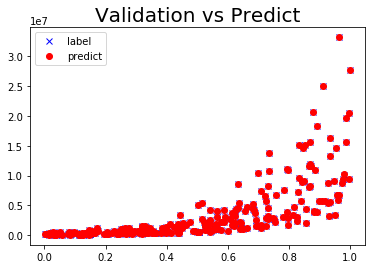

In [23]:
compare_plot(x_valid, y_valid, y_valid_pred, "Validation vs Predict")